In [2]:
# imports and set seed so results are random, but stil reproducable
import tensorflow as tf
import keras
from sklearn.preprocessing import OneHotEncoder
import random
import os  # Helps you manage files and folders
import sys
import cv2  # Working with images
import numpy as np
import seaborn as sns  # Helps you visualize your discoveries
import matplotlib.pyplot as plt  # To plot images
import datetime


print("tensorflow version: "+ tf.__version__)
print("keras version: ", keras.__version__)

def set_seed(seed=0):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  random.seed(seed)
  os.environ['TF_DETERMINISTIC_OPS'] = "1"
  os.environ['TF_CUDNN_DETERMINISM'] = "1"
  os.environ['PYTHONHASHSEED'] = str(seed)
  keras.utils.set_random_seed(seed)

set_seed()

tensorflow version: 2.16.2
keras version:  3.4.1


### 1. Import Model

In [5]:
chckpnt = os.listdir("checkpoints")[0]

model = keras.saving.load_model(f"checkpoints/{chckpnt}")

### 2. Load Test Image

In [10]:
"""
most_recent_file = None
most_recent_time = 0
# iterate over the files in the directory using os.scandir
for entry in os.scandir("beispiele"):
    if entry.is_file():
        # get the modification time of the file using entry.stat().st_mtime_ns
        mod_time = entry.stat().st_mtime_ns
        if mod_time > most_recent_time:
            # update the most recent file and its modification time
            most_recent_file = entry.name
            most_recent_time = mod_time
"""

img = cv2.imread(f"beispiele/cup/GPIO25_2024-07-13-21-15-26.524018.jpg")

img = cv2.resize(img, (32, 32))
img.shape


(32, 32, 3)

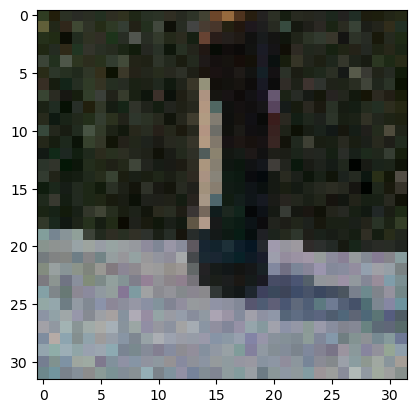

In [11]:
fig, ax = plt.subplots()

ax.imshow(img)

### 3. Predict Picture

In [ ]:
confidences = model.predict(img.reshape(1, 32, 32, 3))

pred = np.argmax(confidences)

print(confidences)

print(f"Predicted: {pred} with confidence {confidences[0][pred]}")

if confidences[0][pred] > 0.5:
    print("I am confident")
else:
    print("I am not confident")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.39933556 0.2224968  0.37816766]]
Predicted: 0 with confidence 0.3993355631828308
I am not confident
